分析指标:
日PV 日UV分析
付费率分析
复购行为分析
漏斗流失率分析
用户价值RFM分析

用户行为分析过程：

说明
一、数据集与分析目的
1、数据集
2、分析目的

二、数据处理
1、数据预览
2、数据处理

三、数据提取与分析
1、网站流量分析
2、用户分析
3、商品销售分析

四、总结
1、关于平台流量与转化率：
2、关于网站用户粘性以及用户消费习惯
3、关于商品销售情况

说明
本次数据分析基于阿里云天池数据集（用户行为数据集），使用转化漏斗，AARRR模型，对常见电商分析指标，包括转化率，PV,UV,留存率，复购率等进行分析，分析过程中使用python进行数据清洗及可视化。

###  二、理解数据

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [158]:
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype=str)
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [9]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802757 entries, 0 to 802756
Data columns (total 6 columns):
user_id          802757 non-null object
item_id          802757 non-null object
behavior_type    802757 non-null object
user_geohash     252627 non-null object
item_category    802757 non-null object
time             802756 non-null object
dtypes: object(6)
memory usage: 36.7+ MB


In [ ]:
# 若数据量太大可以抽样
# data_user = data_user.sample(frac=0.2,replace=False)

user_id          用户ID
item_id          商品ID
behavior_type    字符串，枚举类型，包括(‘pv’, ‘buy’, ‘cart’, ‘fav’)
user_geohash     地理位置
item_category    序列化后的商品所属类目ID
time             行为发生的时间戳

### 三、数据预处理

3.1 统计缺失值

In [10]:
data_user.apply(lambda x: sum(x.isnull())/len(x),axis=0)

user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.685301
item_category    0.000000
time             0.000001
dtype: float64

In [11]:
data_user.apply(lambda x: sum(x.isnull()))

user_id               0
item_id               0
behavior_type         0
user_geohash     550130
item_category         0
time                  1
dtype: int64

发现缺失值大部分是地理信息，暂时不用理会,并将时间类型的一个缺失值删除

In [160]:
data_user.dropna(subset=['time'],how='any',inplace=True)

3.2日期格式处理

In [161]:
data_user['date'] = data_user['time'].str[0:10]
data_user['hour'] = data_user['time'].str[11:]

In [31]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [162]:
# data_user['hour'].fillna(25)   # 缺失值数据类型转换时候的第二种方法，即填充

data_user['time'] = pd.to_datetime(data_user['time'])
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['hour'] = data_user['hour'].astype(int)

In [33]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [34]:
# 对数据根据time来排序
data_user.sort_values(by='time',ascending=True,inplace=True)

In [35]:
# 充值索引
data_user.reset_index(drop=True,inplace=True)

In [36]:
data_user

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,130270245,253791580,2,NaN,9261,2014-11-18 00:00:00,2014-11-18,0
1,71146691,373475577,1,NaN,4370,2014-11-18 00:00:00,2014-11-18,0
2,71146691,212152444,1,NaN,1863,2014-11-18 00:00:00,2014-11-18,0
3,88271974,25265374,1,NaN,1488,2014-11-18 00:00:00,2014-11-18,0
4,106634442,44026159,1,NaN,11955,2014-11-18 00:00:00,2014-11-18,0
...,...,...,...,...,...,...,...,...
802751,132966536,175578758,1,NaN,1083,2014-12-18 23:00:00,2014-12-18,23
802752,88826481,24201365,1,NaN,2261,2014-12-18 23:00:00,2014-12-18,23
802753,92746744,174717351,3,956mmpt,437,2014-12-18 23:00:00,2014-12-18,23
802754,79266183,15955333,1,9rneew6,10567,2014-12-18 23:00:00,2014-12-18,23


In [37]:
# 字符型变量的数据的描述
data_user.describe(include=['object'])

,user_id,item_id,behavior_type,user_geohash,item_category
count,802756,802756,802756,252627,802756
unique,6471,554441,4,132483,6753
top,36233277,97655171,1,94ek6lw,1863
freq,3117,108,756386,101,26360


In [39]:
# 所有的数据的描述
data_user.describe(include='all')

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,802756,802756,802756,252627,802756,802756,802756,802756.000000
unique,6471,554441,4,132483,6753,744,31,NaN
top,36233277,97655171,1,94ek6lw,1863,2014-12-11 22:00:00,2014-12-12 00:00:00,NaN
freq,3117,108,756386,101,26360,3480,45197,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.783176
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.516358
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


#### 四、构建模型

In [ ]:
分析  PV访问量，UV独立访客

In [43]:
# 每天的访问量
pv_daily = data_user.groupby('date').count()['user_id']

In [44]:
pv_daily.head()

date
2014-11-18    23943
2014-11-19    23250
2014-11-20    23372
2014-11-21    21888
2014-11-22    23832
Name: user_id, dtype: int64

In [45]:
# 每天不同独立访客量
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x: x.drop_duplicates().count())

In [46]:
uv_daily.head()

date
2014-11-18    3286
2014-11-19    3268
2014-11-20    3296
2014-11-21    3202
2014-11-22    3157
Name: user_id, dtype: int64

In [55]:
pv_uv_daily = pd.concat([pv_daily,uv_daily],axis=1)

In [48]:
pv_uv_daily.head()

,user_id,user_id
date,,
2014-11-18,23943,3286
2014-11-19,23250,3268
2014-11-20,23372,3296
2014-11-21,21888,3202
2014-11-22,23832,3157


In [60]:
pv_uv_daily.columns = ['pv','uv']
# pv_uv_daily.rename(columns={'user_id':'pv','user_id':'uv'},inplace=True)

In [61]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,23943,3286
2014-11-19,23250,3268
2014-11-20,23372,3296
2014-11-21,21888,3202
2014-11-22,23832,3157


In [63]:
# 计算pv和uv的相关系数
pv_uv_daily.corr(method='pearson')

,pv,uv
pv,1.000000,0.964318
uv,0.964318,1.000000


可知日访问量和日访客数是成正向相关的

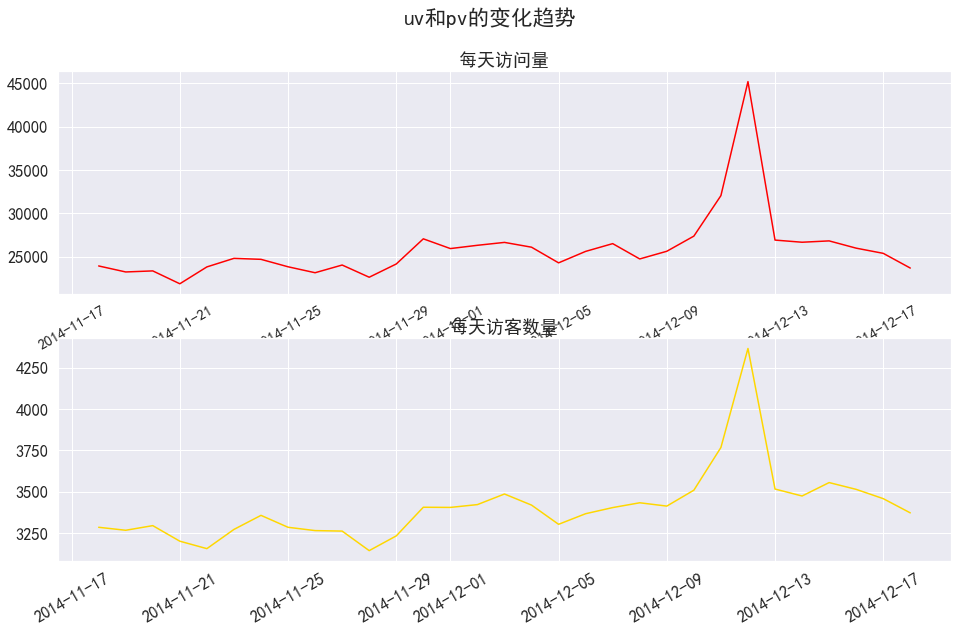

In [80]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.xticks(rotation=30,fontsize=15)
plt.plot(pv_daily,color='red')
plt.title('每天访问量')

plt.subplot(212)
plt.xticks(rotation=30)
plt.plot(uv_daily,color='gold')
plt.title('每天访客数量')
plt.suptitle('uv和pv的变化趋势')

plt.show()

In [81]:
pv_hour = data_user.groupby('hour').count()['user_id']
uv_hour = data_user.groupby('hour')['user_id'].apply(lambda x: x.drop_duplicates().count())

In [82]:
pv_uv_hour = pd.concat([pv_hour,uv_hour],axis=1)

In [86]:
pv_uv_hour.columns = ['pv','uv']
pv_uv_hour.head()

,pv,uv
hour,,
0,35088,3095
1,18433,1937
2,10035,1254
3,6552,947
4,5006,843


In [87]:
pv_uv_hour.corr()

,pv,uv
pv,1.000000,0.879253
uv,0.879253,1.000000


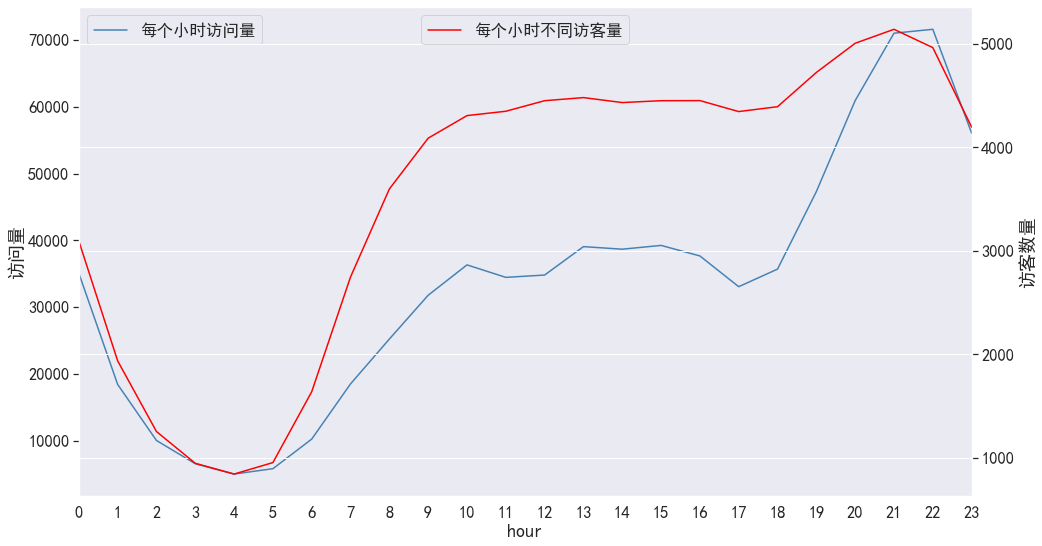

In [94]:
plt.figure(figsize=(16,9))

pv_uv_hour['pv'].plot(color='steelblue',label='每个小时访问量')
plt.legend(loc='upper right')
plt.ylabel('访问量')

pv_uv_hour['uv'].plot(color='red',label='每个小时不同访客量',secondary_y=True)
plt.ylabel('访客数量')

plt.xticks(range(0,24))
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

In [97]:
# 不同行为类型下每个小时的访问量
pv_detail = pd.pivot_table(columns='behavior_type',index='hour',data=data_user,values='user_id',aggfunc=np.size)

In [103]:
pv_detail.columns = ['点击','收藏','加入购物车','购买']
pv_detail

,点击,收藏,加入购物车,购买
hour,,,,
0,33078,747,917,346
1,17436,447,424,126
2,9511,224,242,58
3,6238,125,158,31
4,4733,126,123,24
5,5498,140,149,25
6,9699,235,260,52
7,17581,370,458,105
8,23797,487,697,247


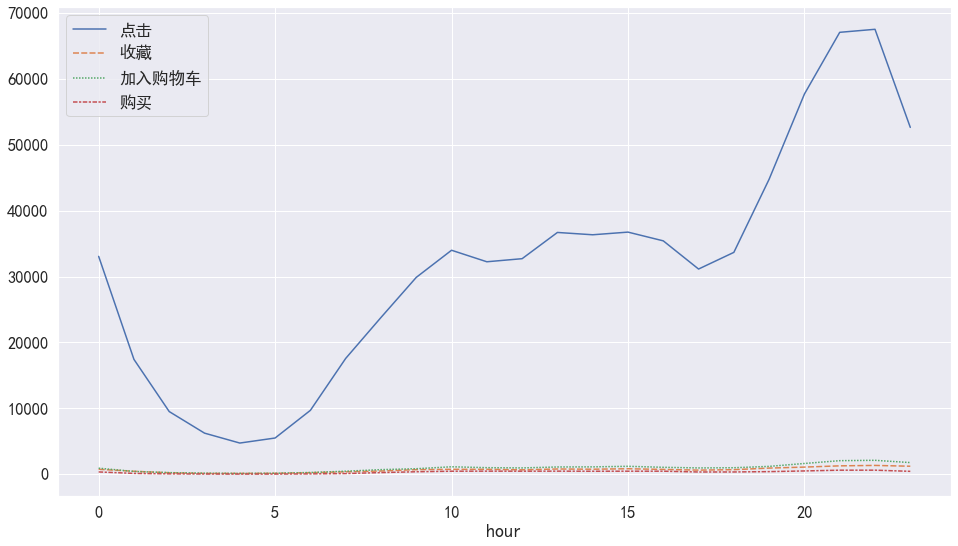

In [104]:
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail)
plt.show()

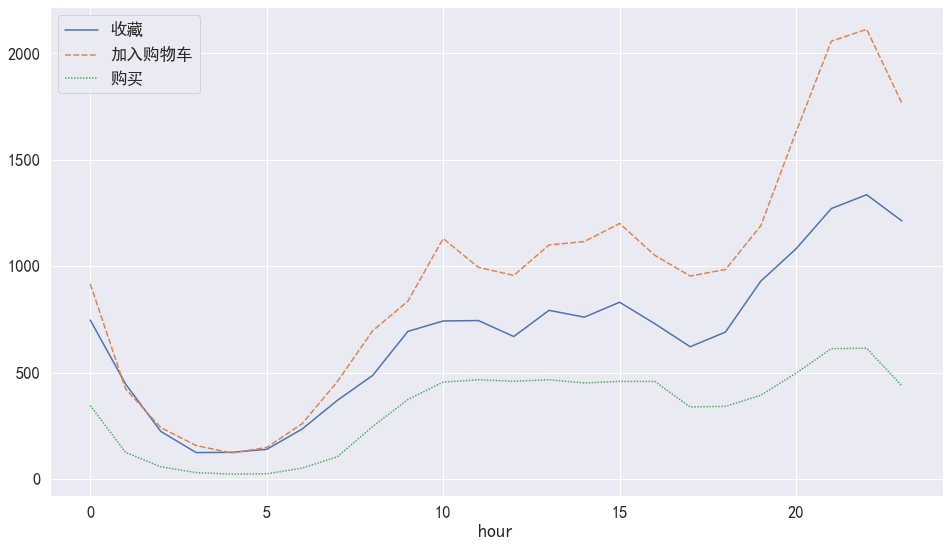

In [105]:
# 剔除点击行为
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail.iloc[:,1:])
plt.show()

In [107]:
data_user_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').size()

In [108]:
data_user_buy.head()

user_id
100012968    2
100024529    2
100027681    4
100035725    1
100067745    2
dtype: int64

In [109]:
data_user_buy.describe()

count    3326.000000
mean        2.359290
std         2.614917
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        82.000000
dtype: float64

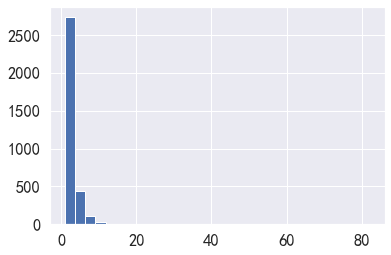

In [111]:
plt.hist(x=data_user_buy,bins=30)
plt.show()

In [121]:
# 不同'date'，不同的'user_id'的购买的次数
data_user_buy1 = data_user[data_user.behavior_type=='4'].groupby(['date','user_id'])
data_user_buy1 = data_user_buy1.count()['behavior_type'].reset_index().rename(columns={'behavior_type':'total'})

In [122]:
data_user_buy1

,date,user_id,total
0,2014-11-18,100024529,1
1,2014-11-18,100128093,1
2,2014-11-18,101538639,4
3,2014-11-18,102014015,1
4,2014-11-18,103962421,1
...,...,...,...
6376,2014-12-18,98607707,1
6377,2014-12-18,99418963,1
6378,2014-12-18,99674599,1
6379,2014-12-18,99785045,1


In [123]:
# 每天的人均消费次数 = 每日消费总次数 / 每日消费人数
data_user_buy2 = data_user_buy1.groupby('date').sum()['total'] / data_user_buy1.groupby('date').count()['total']
data_user_buy2

date
2014-11-18    1.232432
2014-11-19    1.241206
2014-11-20    1.262857
2014-11-21    1.192308
2014-11-22    1.314286
2014-11-23    1.247191
2014-11-24    1.209677
2014-11-25    1.244565
2014-11-26    1.263804
2014-11-27    1.207071
2014-11-28    1.241573
2014-11-29    1.236364
2014-11-30    1.133005
2014-12-01    1.220183
2014-12-02    1.170984
2014-12-03    1.277512
2014-12-04    1.205742
2014-12-05    1.189189
2014-12-06    1.208333
2014-12-07    1.165829
2014-12-08    1.200000
2014-12-09    1.167568
2014-12-10    1.150000
2014-12-11    1.191860
2014-12-12    1.400000
2014-12-13    1.188482
2014-12-14    1.169154
2014-12-15    1.151899
2014-12-16    1.195238
2014-12-17    1.194737
2014-12-18    1.200000
Name: total, dtype: float64

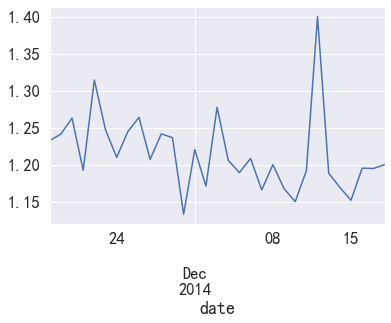

In [125]:
data_user_buy2.plot()
plt.show()

In [126]:
data_user_buy2.describe()

count    31.000000
mean      1.215260
std       0.053003
min       1.133005
25%       1.188835
50%       1.205742
75%       1.241390
max       1.400000
Name: total, dtype: float64

日ARPU : ARPU是衡量产答品的盈利能力，也是从某个方面衡量产品的发展活力。
ARPU值=收入÷付费用户

In [163]:
data_user['operation'] = 1
data_user_buy3 = data_user.groupby(['date','user_id','behavior_type'])['operation'].count().reset_index()

In [164]:
data_user_buy3.rename(columns={'operation':'total'},inplace=True)
data_user_buy3

,date,user_id,behavior_type,total
0,2014-11-18,100024529,1,27
1,2014-11-18,100024529,3,1
2,2014-11-18,100024529,4,1
3,2014-11-18,100027681,1,8
4,2014-11-18,10004287,1,21
...,...,...,...,...
135518,2014-12-18,99796276,1,6
135519,2014-12-18,99796276,3,1
135520,2014-12-18,99796276,4,2
135521,2014-12-18,9996155,1,8


In [138]:
data_user_buy3.groupby('date').apply(lambda x: x[x.behavior_type=='4'].total.sum()/len(x.user_id.unique()))

date
2014-11-18    0.069385
2014-11-19    0.075581
2014-11-20    0.067051
2014-11-21    0.058089
2014-11-22    0.072854
2014-11-23    0.067828
2014-11-24    0.067004
2014-11-25    0.069690
2014-11-26    0.063074
2014-11-27    0.073245
2014-11-28    0.070270
2014-11-29    0.063080
2014-11-30    0.067508
2014-12-01    0.078097
2014-12-02    0.066024
2014-12-03    0.076570
2014-12-04    0.073684
2014-12-05    0.066586
2014-12-06    0.068884
2014-12-07    0.068135
2014-12-08    0.057659
2014-12-09    0.063269
2014-12-10    0.058974
2014-12-11    0.054406
2014-12-12    0.232478
2014-12-13    0.064544
2014-12-14    0.067626
2014-12-15    0.076772
2014-12-16    0.071408
2014-12-17    0.065626
2014-12-18    0.062259
dtype: float64

In [142]:
# 付费率
# 消费次数 / 活跃客户数
b = data_user_buy3.groupby('date').apply(lambda x: x[x.behavior_type=='4'].total.count()/len(x.user_id.unique()))
b

date
2014-11-18    0.056299
2014-11-19    0.060894
2014-11-20    0.053095
2014-11-21    0.048720
2014-11-22    0.055432
2014-11-23    0.054384
2014-11-24    0.055390
2014-11-25    0.055995
2014-11-26    0.049908
2014-11-27    0.060680
2014-11-28    0.056598
2014-11-29    0.051020
2014-11-30    0.059583
2014-12-01    0.064005
2014-12-02    0.056383
2014-12-03    0.059937
2014-12-04    0.061111
2014-12-05    0.055993
2014-12-06    0.057007
2014-12-07    0.058443
2014-12-08    0.048049
2014-12-09    0.054189
2014-12-10    0.051282
2014-12-11    0.045648
2014-12-12    0.166056
2014-12-13    0.054308
2014-12-14    0.057842
2014-12-15    0.066648
2014-12-16    0.059744
2014-12-17    0.054929
2014-12-18    0.051883
dtype: float64

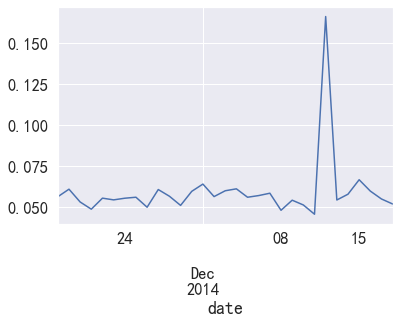

In [144]:
b.plot()
plt.show()

In [171]:
# 同一时间段内
data_user_buy4 = data_user[data_user.behavior_type=='4'].groupby(['user_id','date','hour'])
data_user_buy4

In [178]:
c = data_user_buy4['operation'].sum()
c

user_id    date        hour
100012968  2014-11-22  0       1
           2014-11-25  21      1
100024529  2014-11-18  8       1
           2014-11-19  1       1
100027681  2014-11-22  10      3
                              ..
99796276   2014-12-18  19      2
99851929   2014-11-29  19      1
99900937   2014-12-06  14      1
           2014-12-17  14      1
99989881   2014-12-04  22      1
Name: operation, Length: 6855, dtype: int64

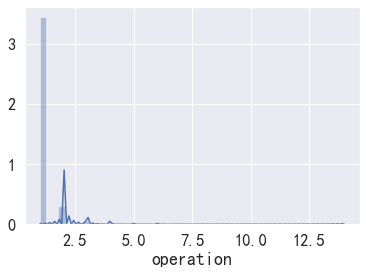

In [177]:
sns.distplot(c)
plt.show()

复购行为分析
复购率 复购行为用户数 / 购买行为用户数

In [180]:
data_rebuy = data_user[data_user.behavior_type=='4'].groupby('user_id')['date'].apply(lambda x:len(x.unique()))
data_rebuy

user_id
100012968    2
100024529    2
100027681    2
100035725    1
100067745    2
            ..
99796192     1
99796276     2
99851929     1
99900937     2
99989881     1
Name: date, Length: 3326, dtype: int64

In [181]:
data_rebuy[data_rebuy>=2].count() / data_rebuy.count()

0.46692723992784124

In [192]:
data_day_buy = data_user[data_user.behavior_type=='4'].groupby('user_id').date.apply(lambda x: x.sort_values())
data_day_buy

user_id          
100012968  505602   2014-11-22
           505674   2014-11-25
100024529  673618   2014-11-18
           673642   2014-11-19
100027681  476170   2014-11-22
                       ...    
99796276   765071   2014-12-18
99851929   107252   2014-11-29
99900937   463252   2014-12-06
           462932   2014-12-17
99989881   426775   2014-12-04
Name: date, Length: 7847, dtype: datetime64[ns]

In [196]:
data_day_buy = data_user[data_user.behavior_type=='4'].groupby('user_id').date.apply(lambda x: x.sort_values().diff(1).dropna())
data_day_buy

user_id          
100012968  505674    3 days
100024529  673642    1 days
100027681  476186    0 days
           476242    0 days
           476154    6 days
                      ...  
99674599   131263    8 days
           192391    6 days
99796276   764882    3 days
           765071    0 days
99900937   462932   11 days
Name: date, Length: 4521, dtype: timedelta64[ns]

In [199]:
data_day_buy.map(lambda x:x.days)

user_id          
100012968  505674     3
100024529  673642     1
100027681  476186     0
           476242     0
           476154     6
                     ..
99674599   131263     8
           192391     6
99796276   764882     3
           765071     0
99900937   462932    11
Name: date, Length: 4521, dtype: int64

漏斗模型分析

In [202]:
data_user_count = data_user.groupby('behavior_type').size()
data_user_count

behavior_type
1    756386
2     16013
3     22510
4      7847
dtype: int64

In [204]:
pv_all = data_user['user_id'].count()
pv_all

802756

In [205]:
# 流失率
(pv_all-data_user_count[0])/pv_all

0.057763504726218176

In [206]:
# 加入购物车的数量的流失率
(data_user_count[0]-data_user_count[2])/data_user_count[0]

0.9702400626135333

In [207]:
# 加入购物车 到 收藏
(data_user_count[2]-data_user_count[1])/data_user_count[2]

0.28862727676588185

In [208]:
# 从收藏到购买
(data_user_count[1]-data_user_count[3])/data_user_count[1]

0.509960656966215

### 用户价值的RFM的分析

In [293]:
# from datetime import datetime
# R_group = data_user[data_user['behavior_type']=='4'].groupby('user_id')['date']
# # R = R_group.apply(lambda x: x.iloc[-1])
# R = R_group.apply(lambda x: x.iloc[-1] )
# R
datetime(2014.12.10)

SyntaxError: invalid syntax (<ipython-input-293-4a4a2b92d388>, line 6)

In [247]:

# R = data_user[data_user['behavior_type']=='4'].groupby('user_id')['date'].apply(lambda x: datetime(data_user['date'].max())-x.max())
# R

In [252]:
F = data_user[data_user['behavior_type']=='4'].groupby('user_id')['date'].count()
F

user_id
100012968    2
100024529    2
100027681    4
100035725    1
100067745    2
            ..
99796192     1
99796276     3
99851929     1
99900937     2
99989881     1
Name: date, Length: 3326, dtype: int64

In [253]:
F.reset_index().rename(columns={'date':'freq'})

,user_id,freq
0,100012968,2
1,100024529,2
2,100027681,4
3,100035725,1
4,100067745,2
...,...,...
3321,99796192,1
3322,99796276,3
3323,99851929,1
3324,99900937,2


In [ ]:
rfm = pd.merge(F,M left_on='user_id',right_on='user_id')

In [ ]:
rfm['R'] = pd.qcut(rfm.R,2,labels=['2','1'])
rfm['F'] = pd.qcut(rfm.F,2,labels=['1','2'])

In [ ]:
rfm['rfm'] = rfm['R'].str.cat(rfm['F'])